In [ ]:
# !pip install py-feat

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from feat import Fex
from feat import Detector

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# face_model = "retinaface"
# landmark_model = "PFLD"
# au_model = "jaanet"
# emotion_model = "ResMaskNet"

In [4]:
detector = Detector(
    face_model="retinaface",
    landmark_model="PFLD",
    au_model='jaanet',
    emotion_model="resmasknet",
    facepose_model="img2pose",
)

  0%|          | 0/1786259 [00:00<?, ?it/s]

  0%|          | 0/8891786 [00:00<?, ?it/s]

  0%|          | 0/93520369 [00:00<?, ?it/s]

  0%|          | 0/12291088 [00:00<?, ?it/s]

  0%|          | 0/10804928 [00:00<?, ?it/s]

  0%|          | 0/551634217 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/944 [00:00<?, ?it/s]

  0%|          | 0/169843940 [00:00<?, ?it/s]

  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/176 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
 

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
# detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

In [10]:
test_image='/content/drive/MyDrive/Emotion_detection/fear-marked-1280x720.jpg'

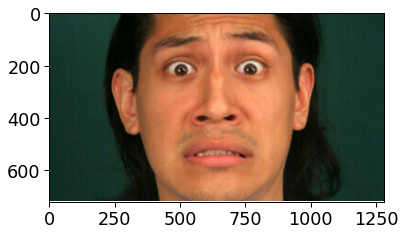

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
f, ax = plt.subplots()
im = Image.open(test_image)
ax.imshow(im);

In [12]:
image_prediction = detector.detect_image(test_image)

# Show results
image_prediction

,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,Roll,Yaw,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0,337.235352,-8.874292,582.564331,718.256592,0.999846,339.824054,343.933147,355.410895,372.634488,...,-1.978592,-3.520834,0.0003,0.000647,0.992039,0.000003,0.005431,0.001373,0.000207,/content/drive/MyDrive/Emotion_detection/fear-...


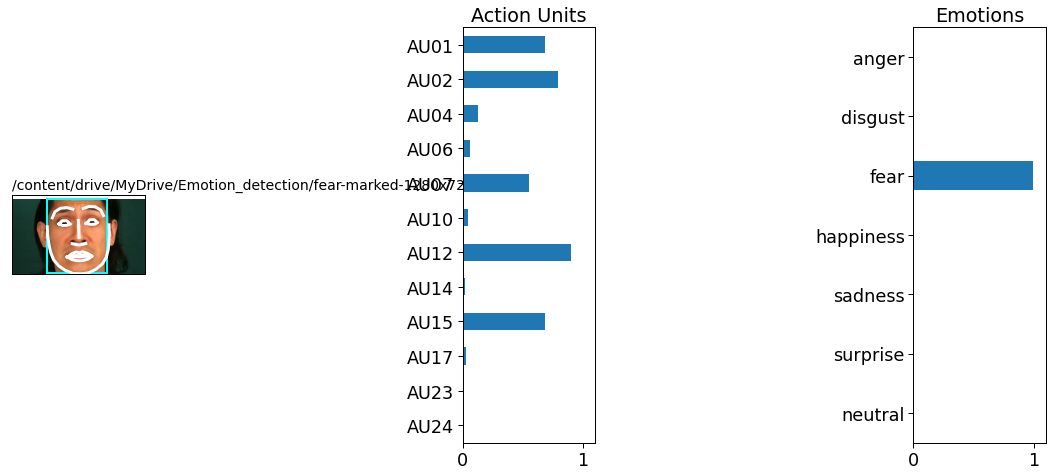

In [13]:
image_prediction.plot_detections();

In [14]:
# function take image prediction and outputs lab
def making_predicted_label(img_prediction):
  # Making A dictionary
  emotions_dict={'anger':0,'disgust':0,'fear':0,'happiness':0,'sadness':0,'surprise':0,'neutral':0}

  #kvsmkmvklmvklsm
  emotions_dict['anger']=img_prediction.emotions['anger'][0]
  emotions_dict['disgust']=img_prediction.emotions['disgust'][0]
  emotions_dict['fear']=img_prediction.emotions['fear'][0]
  emotions_dict['happiness']=img_prediction.emotions['happiness'][0]
  emotions_dict['sadness']=img_prediction.emotions['sadness'][0]
  emotions_dict['surprise']=img_prediction.emotions['surprise'][0]
  emotions_dict['neutral']=img_prediction.emotions['neutral'][0]

  new_value = max(emotions_dict, key=emotions_dict.get)

  if new_value =='fear' or new_value == 'surprise':
    final_value='surprise'
    label_predicted=2
  elif new_value =='happiness':
    label_predicted=1
  elif new_value =='sadness':
    label_predicted=3
  else:
      label_predicted=4
  
  return label_predicted

In [15]:
val=making_predicted_label(image_prediction)

In [16]:
import pandas as pd

df= pd.read_csv("/content/drive/MyDrive/Emotion_detection/Data.csv")

In [17]:
df.head()

,image_path,label
0,['peakImages/1_1_116.jpg'],[[1]]
1,['peakImages/1_2_25.jpg'],[[1]]
2,['peakImages/1_3_149.jpg'],[[1]]
3,['peakImages/1_4_95.jpg'],[[1]]
4,['peakImages/1_5_39.jpg'],[[3]]


In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [19]:
value_lst=[]
label_lst=[]

# making sure indexes pair with number of rows
df_train = train.reset_index()  

for index, row in df_train.iterrows():
    value_lst.append('/content/drive/MyDrive/Emotion_detection/'+train.iloc[index][0][2:-2])
    label_lst.append(int(train.iloc[index][1][2:-2]))

In [20]:
final_train_df= pd.DataFrame(list(zip(value_lst, label_lst)),columns =['path', 'label'])

In [21]:
final_train_df.head(15)

,path,label
0,/content/drive/MyDrive/Emotion_detection/peakI...,1
1,/content/drive/MyDrive/Emotion_detection/peakI...,4
2,/content/drive/MyDrive/Emotion_detection/peakI...,3
3,/content/drive/MyDrive/Emotion_detection/peakI...,1
4,/content/drive/MyDrive/Emotion_detection/peakI...,3
5,/content/drive/MyDrive/Emotion_detection/peakI...,1
6,/content/drive/MyDrive/Emotion_detection/peakI...,3
7,/content/drive/MyDrive/Emotion_detection/peakI...,4
8,/content/drive/MyDrive/Emotion_detection/peakI...,3
9,/content/drive/MyDrive/Emotion_detection/peakI...,4


In [22]:
test_value_lst=[]
test_label_lst=[]

# making sure indexes pair with number of rows
df_test = test.reset_index()  

for index, row in df_test.iterrows():
    test_value_lst.append('/content/drive/MyDrive/Emotion_detection/'+test.iloc[index][0][2:-2])
    test_label_lst.append(int(test.iloc[index][1][2:-2]))

In [23]:
final_test_df= pd.DataFrame(list(zip(test_value_lst, test_label_lst)),columns =['path', 'label'])

In [24]:
final_test_df.head()

,path,label
0,/content/drive/MyDrive/Emotion_detection/peakI...,1
1,/content/drive/MyDrive/Emotion_detection/peakI...,3
2,/content/drive/MyDrive/Emotion_detection/peakI...,2
3,/content/drive/MyDrive/Emotion_detection/peakI...,1
4,/content/drive/MyDrive/Emotion_detection/peakI...,1
